# Shap

this is a practice notebook for the Shap library and Explaiable AI

### Imports

In [1]:
import pandas as pd                 #pip install pandas
import numpy as np

import matplotlib.pyplot as plt     #pip install matplotlib
import seaborn as sns               #pip install seaborn

import xgboost as xgb               #pip install xgboost

import shap                         #pip install shap
shap.initjs()                       #initializes the visialization module 

c:\Users\iftek\anaconda3\envs\Diffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data

In [2]:
# importing dataset
data = pd.read_csv("Data\BPT\FLD_data_2ndtime.csv")

print(len(data))
data.head()

1106


,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Class_Label
0,0.839299,0.170988,0.083984,0.047367,0.612101,web-pro
1,0.849555,0.100009,0.032557,0.001654,0.392036,oop
2,0.784907,0.373114,0.065501,0.007660,0.313509,mobile
3,0.830270,0.610333,0.094850,0.041251,0.296325,mobile
4,0.830270,0.610333,0.094850,0.041251,0.296325,oop


Exploring the data

Text(0.5, 0, 'Class label')

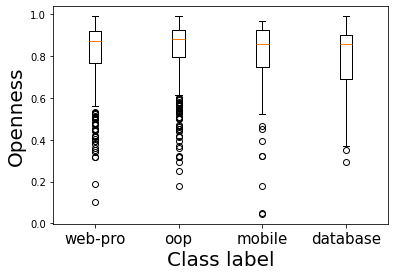

In [3]:
#sex
plt.boxplot(data[data.Class_Label=='web-pro']['Openness'],positions=[1])
plt.boxplot(data[data.Class_Label=='oop']['Openness'],positions=[2])
plt.boxplot(data[data.Class_Label=='mobile']['Openness'],positions=[3])
plt.boxplot(data[data.Class_Label=='database']['Openness'],positions=[4])

plt.xticks(ticks=[1,2,3,4], labels=['web-pro','oop','mobile','database'],size=15)
plt.ylabel('Openness', size=20)
plt.xlabel('Class label', size=20)

Text(0.5, 0, 'Class label')

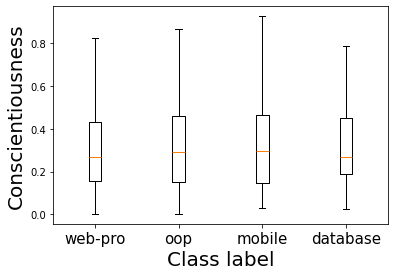

In [4]:
#sex
plt.boxplot(data[data.Class_Label=='web-pro']['Conscientiousness'],positions=[1])
plt.boxplot(data[data.Class_Label=='oop']['Conscientiousness'],positions=[2])
plt.boxplot(data[data.Class_Label=='mobile']['Conscientiousness'],positions=[3])
plt.boxplot(data[data.Class_Label=='database']['Conscientiousness'],positions=[4])

plt.xticks(ticks=[1,2,3,4], labels=['web-pro','oop','mobile','database'],size=15)
plt.ylabel('Conscientiousness', size=20)
plt.xlabel('Class label', size=20)

Text(0.5, 0, 'Class label')

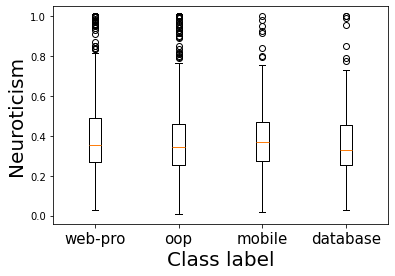

In [5]:
#sex
plt.boxplot(data[data.Class_Label=='web-pro']['Neuroticism'],positions=[1])
plt.boxplot(data[data.Class_Label=='oop']['Neuroticism'],positions=[2])
plt.boxplot(data[data.Class_Label=='mobile']['Neuroticism'],positions=[3])
plt.boxplot(data[data.Class_Label=='database']['Neuroticism'],positions=[4])

plt.xticks(ticks=[1,2,3,4], labels=['web-pro','oop','mobile','database'],size=15)
plt.ylabel('Neuroticism', size=20)
plt.xlabel('Class label', size=20)

<Axes: >

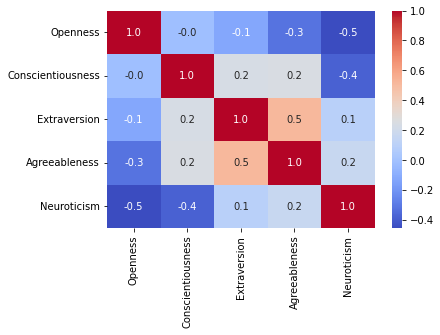

In [6]:
#correlation 
cont = ["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]
corr_matrix = pd.DataFrame(data[cont],columns=cont).corr()

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.1f')

Chosen data columns

In [7]:
y = data[['Class_Label']]
x = data[["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]]

Data preparation

In [8]:
# As Sex is a categorical variable we are going to create dummy variable to express them
# y['Class_Label.web_pro'] = [1 if c == 'web-pro' else 0 for c in y['Class_Label']]
# y['Class_Label.oop'] = [1 if c == 'oop' else 0 for c in y['Class_Label']]
# y['Class_Label.mobile'] = [1 if c == 'mobile' else 0 for c in y['Class_Label']]
# y['Class_Label.database'] = [1 if c == 'database' else 0 for c in y['Class_Label']]
# y = y.drop('Class_Label', axis=1)

# y.head

In [9]:
# As Sex is a categorical variable we are going to create dummy variable to express them
y['Class_Label'] = [0 if c == 'web-pro' else c for c in y['Class_Label']]
y['Class_Label'] = [1 if c == 'oop' else c for c in y['Class_Label']]
y['Class_Label'] = [2 if c == 'mobile' else c for c in y['Class_Label']]
y['Class_Label'] = [3 if c == 'database' else c for c in y['Class_Label']]
# y = y.drop('Class_Label_up', axis=1)

y.head

C:\Users\iftek\AppData\Local\Temp\ipykernel_7404\2588249936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class_Label'] = [0 if c == 'web-pro' else c for c in y['Class_Label']]
C:\Users\iftek\AppData\Local\Temp\ipykernel_7404\2588249936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class_Label'] = [1 if c == 'oop' else c for c in y['Class_Label']]
C:\Users\iftek\AppData\Local\Temp\ipykernel_7404\2588249936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<bound method NDFrame.head of       Class_Label
0               0
1               1
2               2
3               2
4               1
...           ...
1101            0
1102            1
1103            1
1104            2
1105            0

[1106 rows x 1 columns]>

## Modelling

In [10]:
# Train
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
# get probability pred
model.predict_proba(x)[0]
# the highest value represents the probable class 
# in the order of web_0 > oop_1 > mobile_2 > database_3

array([0.84287226, 0.14491493, 0.00370597, 0.0085068 ], dtype=float32)

## SHAP Tests

In [12]:
# SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(x)

In [13]:
np.shape(shap_values.values)
# number of samples , number of x clumns (feature), number of predicting classes

(1106, 5, 4)

### Shap Waterfall

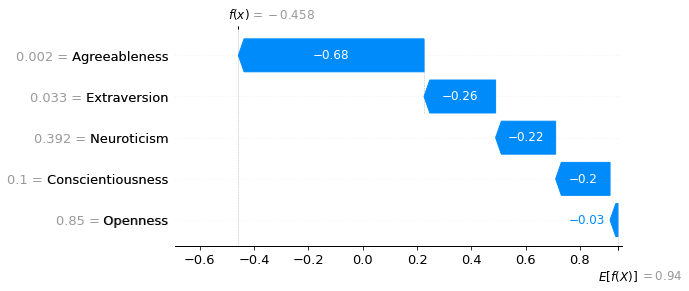

In [14]:
# Waterfall plot for first observation 
shap.plots.waterfall(shap_values[1,:,0]) # web-pro

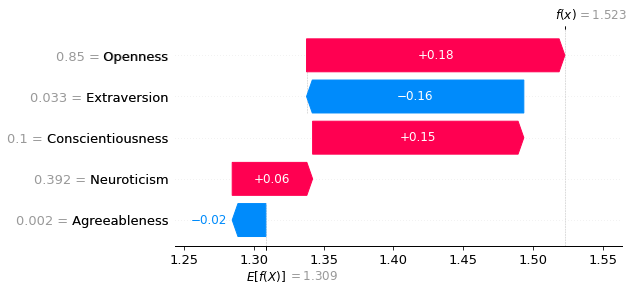

In [15]:
shap.plots.waterfall(shap_values[1,:,1]) # oop

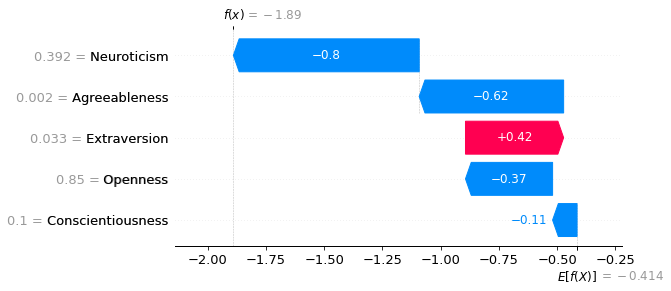

In [16]:
shap.plots.waterfall(shap_values[1,:,2]) # mobile

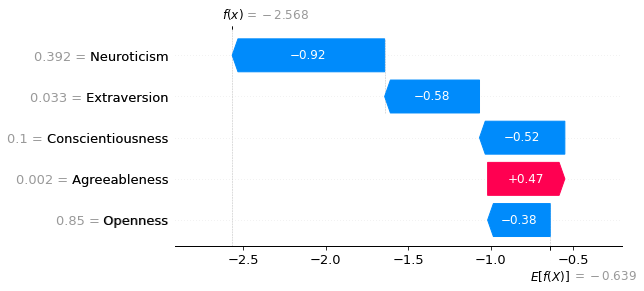

In [17]:
shap.plots.waterfall(shap_values[1,:,3]) # database

### Force Plot

In [18]:
shap.plots.force(shap_values[85,:,0])

In [19]:
shap.plots.force(shap_values[85,:,1])

In [20]:
shap.plots.force(shap_values[85,:,2])

In [21]:
shap.plots.force(shap_values[85,:,3])

### Stacked Force Plot

In [22]:
# uses multiple observations to show a trend 
shap.plots.force(shap_values[:200,:,0])

In [23]:
# uses multiple observations to show a trend 
shap.plots.force(shap_values[:200,:,1])

In [24]:
# uses multiple observations to show a trend 
shap.plots.force(shap_values[:200,:,2])

In [25]:
# uses multiple observations to show a trend 
shap.plots.force(shap_values[:200,:,3])

### Absolute Mean Shap Plot 

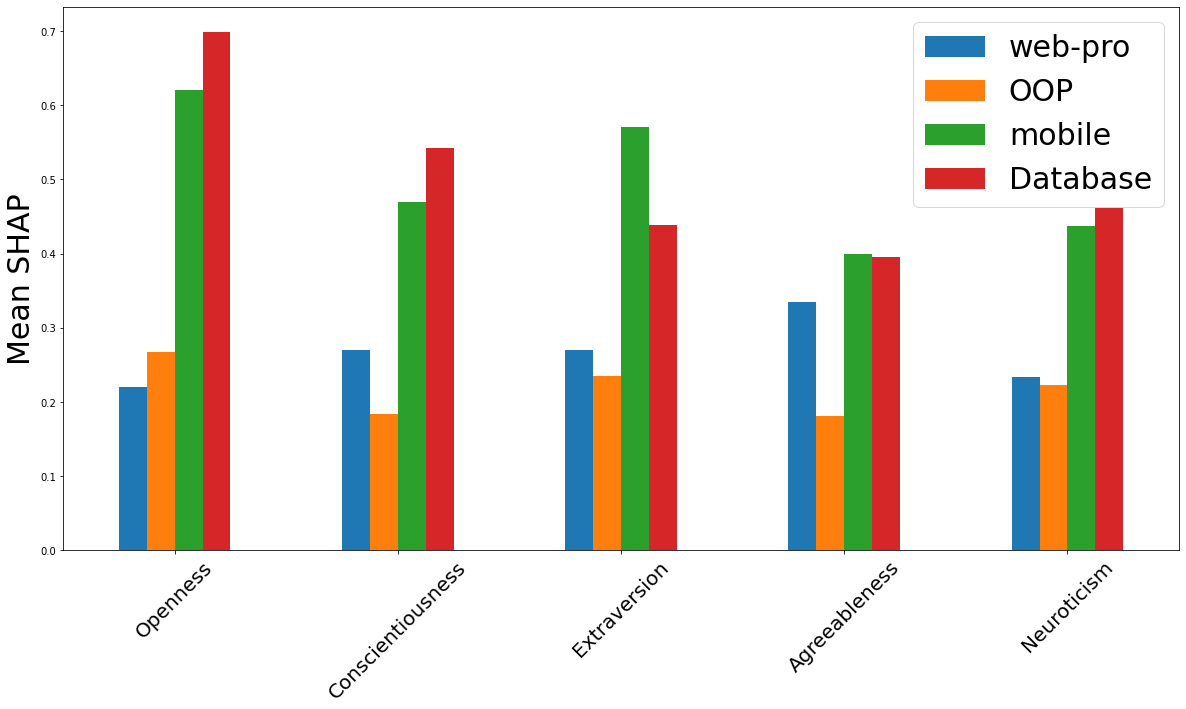

In [26]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values.values[:,:,0]), axis=0)
mean_1 = np.mean(np.abs(shap_values.values[:,:,1]), axis=0)
mean_2 = np.mean(np.abs(shap_values.values[:,:,2]), axis=0)
mean_3 = np.mean(np.abs(shap_values.values[:,:,3]), axis=0)

df = pd.DataFrame({"web-pro":mean_0,"OOP": mean_1,"mobile": mean_2, "Database": mean_3})

#ploting the mean shap values

fig,ax=plt.subplots(1,1,figsize=(20,10))
df.plot.bar(ax=ax)

ax.set_ylabel("Mean SHAP", size=30)
ax.set_xticklabels(x.columns,rotation=45,size=20)
ax.legend(fontsize=30)

### Fix Skew
To reduce the possiblity of a skewed chart we can calculate the mean for predicted class only

In [27]:
# preds = model.predict(x)

# new_shap_values = []
# for i,pred in enumerate(preds):
#     # get shap values for the predicted class only 
#     new_shap_values.append(shap_values.values[i][:,pred])

# # replace shap values
# shap_values.values = np.array(new_shap_values)
# print(shap_values.shape)

(1106, 5)


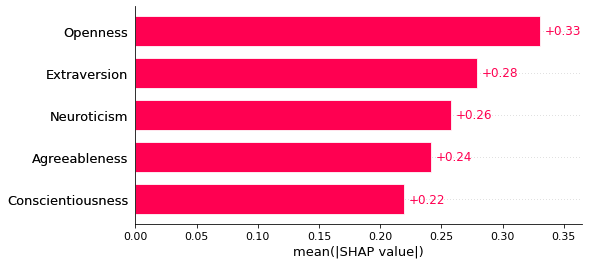

In [28]:
# # abr chart
# shap.plots.bar(shap_values)

### Beeswarm Plot

In [31]:
shap_values_web = shap_values[:,:,0]
shap_values_oop = shap_values[:,:,1]
shap_values_mobile = shap_values[:,:,2]
shap_values_database = shap_values[:,:,3]

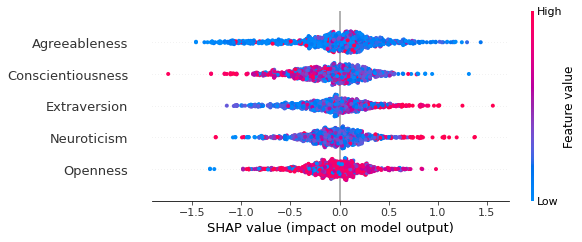

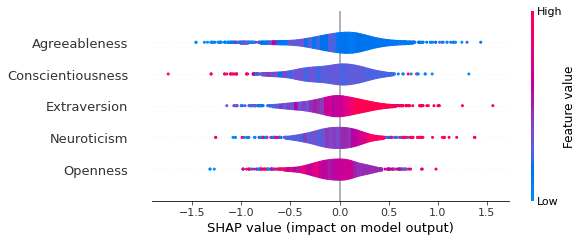

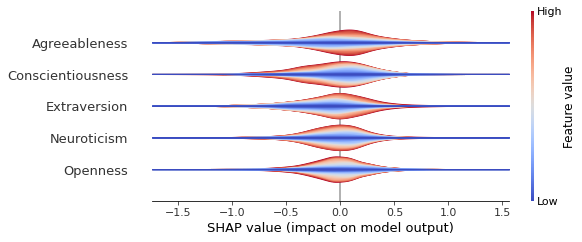

In [49]:
shap.plots.beeswarm(shap_values_web)
shap.plots.violin(shap_values_web)
shap.plots.violin(shap_values_web,plot_type="layered_violin")

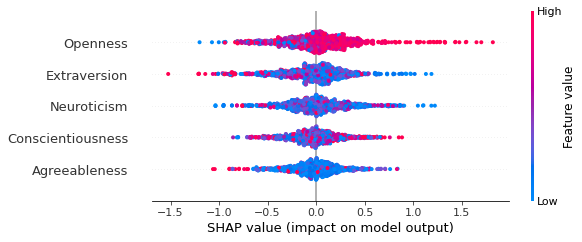

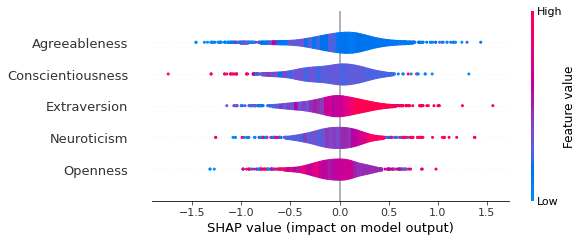

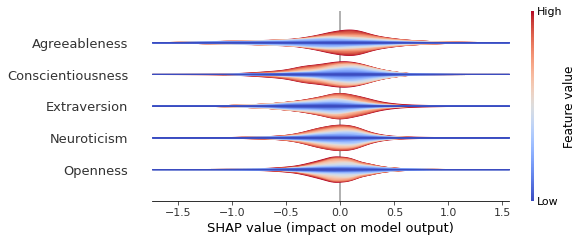

In [50]:
shap.plots.beeswarm(shap_values_oop)
shap.plots.violin(shap_values_web)
shap.plots.violin(shap_values_web,plot_type="layered_violin")

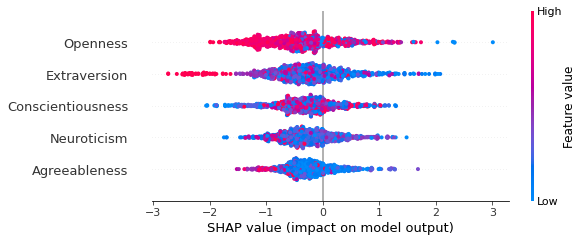

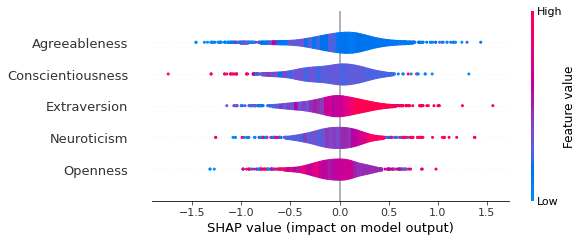

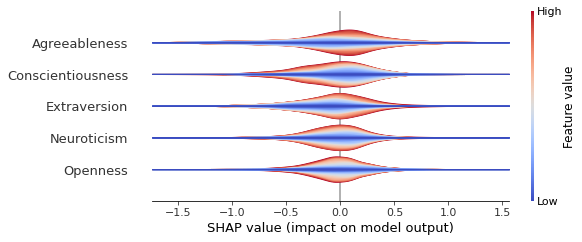

In [51]:
shap.plots.beeswarm(shap_values_mobile)
shap.plots.violin(shap_values_web)
shap.plots.violin(shap_values_web,plot_type="layered_violin")

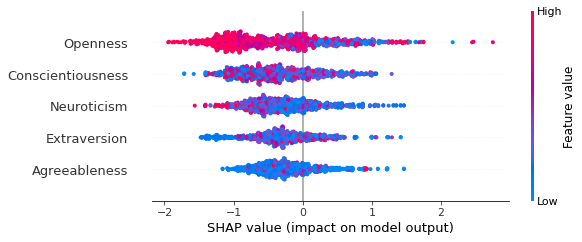

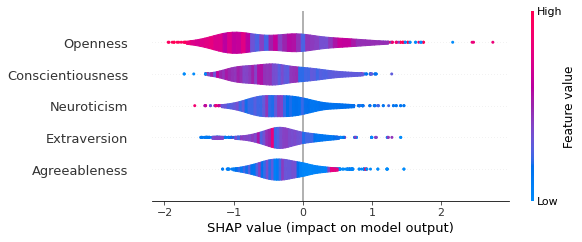

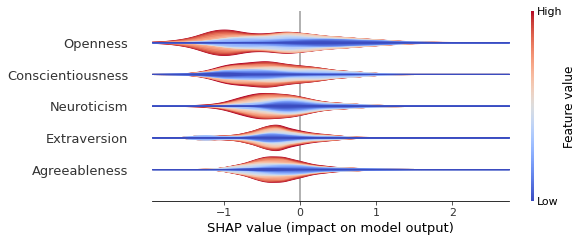

In [52]:
shap.plots.beeswarm(shap_values_database)
shap.plots.violin(shap_values_database)
shap.plots.violin(shap_values_database,plot_type="layered_violin")

### Shap mean plots 

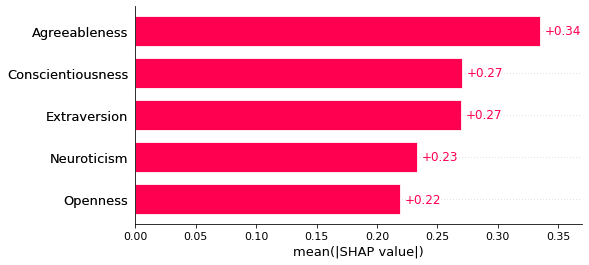

In [38]:
shap.plots.bar(shap_values_web)

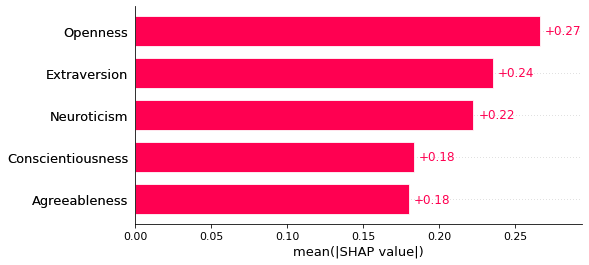

In [39]:
shap.plots.bar(shap_values_oop)

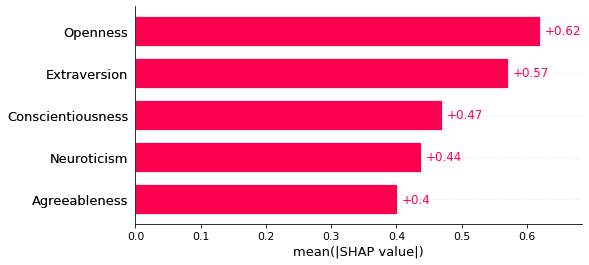

In [40]:
shap.plots.bar(shap_values_mobile)

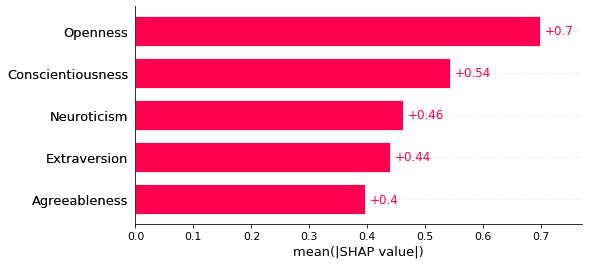

In [42]:
shap.plots.bar(shap_values_database)

### Heatmaps 

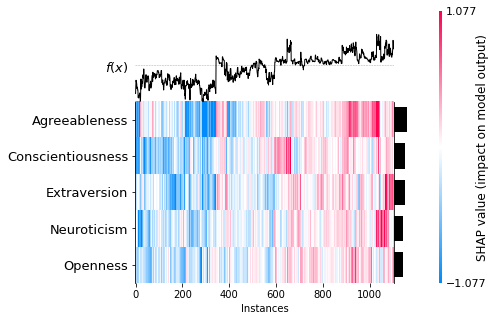

In [56]:
shap.plots.heatmap(shap_values_web)

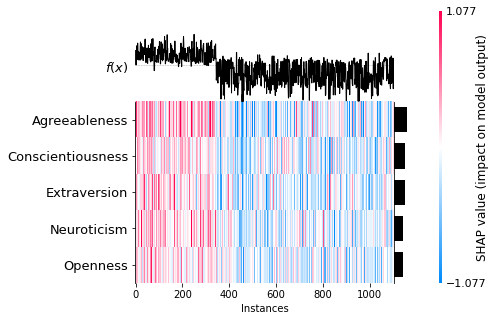

In [63]:
order = np.argsort(model.predict(x))
shap.plots.heatmap(shap_values_web,instance_order=order)

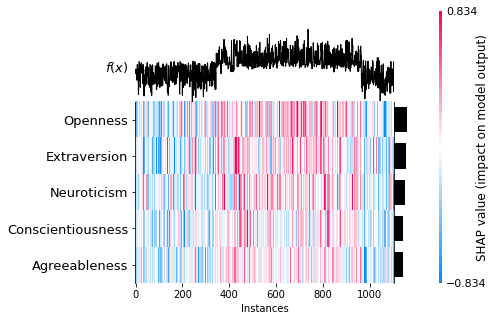

In [64]:
shap.plots.heatmap(shap_values_oop,instance_order=order)

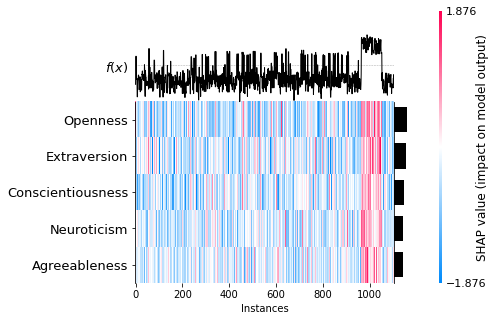

In [65]:
shap.plots.heatmap(shap_values_mobile,instance_order=order)

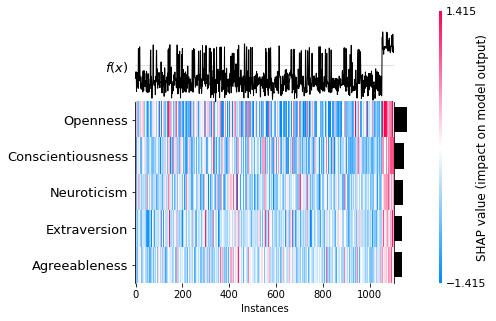

In [66]:
shap.plots.heatmap(shap_values_database,instance_order=order)